# Práctica 4 - Forward propagation

__Curso__: Statistical Learning II

__Catedrático__: Ing. Luis Leal

__Estudiante__: Dany Rafael Díaz Lux (21000864)

__Instrucciones__:
* Completar el ejercicio empezado en clase de forward-propagation para los 3 diagramas dados.
* En el tercer diagrama analizar la representación intermedia.

In [1]:
# Importar librerías que utilizaremos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Diagrama 1
* Utilizando Numpy definir una función para calcular la salida de los siguientes modelos.
* Dado que cada sub-modelo “detecta” una característica intermedia h(variable latente) determinar  para cada entrada la característica intermedia con mayor presencia.

<img src='diagrama1.png'>

In [2]:
# Función sigmoid
def sigmoid(X):
    return 1.0/(1.0+np.exp(-X))

def agregarSesgo(x):
    # Si la entrada no viene en forma matricial, se compone adecuadamente
    if len(x.shape) < 2:
        x = np.array(x).reshape(x.shape[0], -1)
    # Agregar sesgo y devolver
    return np.append(x, np.ones(x.shape[0]).reshape(-1,1), 1)

# Función que calculará la salida a la red neuronal
def procesarRedNeuronal(entrada, listaMatricesParametros, listaFuncionesActivaciones, agregarSesgoAEntrada = 0, agregarSesgoACapasOcultas = 1):
    # Si se debe agregar sesgo, se agrega una columna de 1's a la entrada
    if(agregarSesgoAEntrada == 1):
        entrada = agregarSesgo(entrada)
    
    ultimoResultado = entrada
    # Recorrer lista de matrices de parámetros hasta generar respuesta
    for i, matrizParametros in enumerate(listaMatricesParametros):
        # calcular resultado con capa i
        ultimoResultado = np.matmul(ultimoResultado, matrizParametros)
        # aplicar función de activación i
        if(listaFuncionesActivaciones[i] == 1): # Si la función de activación es sigmoid
            ultimoResultado = sigmoid(ultimoResultado)
        # guardar resultado intermedio
        if(i == 0):
            resultadoOculto = np.copy(ultimoResultado)
        # agregar sesgo si ya no existen más capas
        if((agregarSesgoACapasOcultas == 1) and ((i + 1) < len(listaMatricesParametros))):
            ultimoResultado = agregarSesgo(ultimoResultado)
        
    return resultadoOculto, ultimoResultado

In [3]:
# Matriz de parámetros entre capa de entrada y capa oculta
mp1_2 = np.array([[5.0, 7.0],\
                [-2.0, -3.0],\
                [-8.0, 1.0]])
# Matriz de parámetros entre capa oculta y capa de salida
mp2_3 = np.array([[7.0], [5.0], [-6.0]])
# Lista que señalará funciones de activación sigmoidales
listaActivaciones = [1, 1]
# Entradas
x = np.array([[0.0, 0.0],\
              [0.0, 1.0],\
              [1.0, 0.0],\
              [1.0, 1.0],\
              [0.0, 5.0],\
              [5.0, 0.0],\
              [5.0, 5.0],\
              [2.0, 2.0],\
              [0.0, 10.0],\
              [10.0, 0.0],\
              [10.0, 10.0],\
              [0.0, -5.0],\
              [-5.0, 0.0],\
              [-5.0, -5.0],\
              [0.0, -10.0],\
              [-10.0, 0.0],\
              [-10.0, -10.0],\
              [10.0, -10.0],\
              [-10.0, 10.0]])
# Procesar red neuronal
caracteristicasLatentes, resultado = procesarRedNeuronal(x, [mp1_2, mp2_3], listaActivaciones, 1)

In [4]:
# Mostrar tabla con resultados
resultados = np.concatenate((x, caracteristicasLatentes, resultado), axis=1)
df = pd.DataFrame(resultados, columns = ['x1','x2','h1', 'h2', 'resultado'])
display(df)

,x1,x2,h1,h2,resultado
0,0.0,0.0,3.353501e-04,7.310586e-01,0.087675
1,0.0,1.0,4.539787e-05,1.192029e-01,0.004480
2,1.0,0.0,4.742587e-02,9.996646e-01,0.338565
3,1.0,1.0,6.692851e-03,9.933071e-01,0.271581
4,0.0,5.0,1.522998e-08,8.315280e-07,0.002473
5,5.0,0.0,1.000000e+00,1.000000e+00,0.997527
6,5.0,5.0,9.990889e-01,1.000000e+00,0.997512
7,2.0,2.0,1.192029e-01,9.998766e-01,0.458546
8,0.0,10.0,6.914400e-13,2.543666e-13,0.002473
9,10.0,0.0,1.000000e+00,1.000000e+00,0.997527


## Comentarios a modelo neuronal en diagrama 1
Con base en los resultados de la tabla mostrada en la parte de arriba:
* Si __x1__ es mucho mayor a __x2__, el resultado se acercará a 1.
* Si __x2__ es mucho mayor a __x1__, el resultado se acercará a 0.
* Si __x1__ y __x2__ son iguales y estos valores mayores a 2, el resultado se acercará a 1, de lo contrario se acercará a 0.
* En la mayoría de los casos __h1__ es mayor a __h2__ excepto cuando __x1__ es mucho menor __x2__.

## Diagrama 2
* Utilizando Numpy definir una función para calcular la salida de los siguientes modelos.
* Dado que cada sub-modelo “detecta” una característica intermedia h(variable latente) determinar  para cada entrada la característica intermedia con mayor presencia.

<img src='diagrama2.png'>

In [5]:
# Matriz de parámetros entre capa de entrada y capa oculta
mp1_2 = np.array([[0.8, 0.4, 0.3],\
                [0.2, 0.9, 0.5]])
# Matriz de parámetros entre capa oculta y capa de salida
mp2_3 = np.array([[0.3], [0.5], [0.9]])
# Lista que señalará funciones de activación sigmoidales
listaActivaciones = [1, 1]
# Entradas
x = np.array([[0.0, 0.0],\
              [0.0, 1.0],\
              [1.0, 0.0],\
              [1.0, 1.0],\
              [0.0, 5.0],\
              [5.0, 0.0],\
              [5.0, 5.0],\
              [2.0, 2.0],\
              [0.0, 10.0],\
              [10.0, 0.0],\
              [10.0, 10.0],\
              [0.0, -5.0],\
              [-5.0, 0.0],\
              [-5.0, -5.0],\
              [0.0, -10.0],\
              [-10.0, 0.0],\
              [-10.0, -10.0],\
              [10.0, -10.0],\
              [-10.0, 10.0]])
# Procesar red neuronal, importante notar que no se agregarán sesgos ni en entrada ni capas ocultas
caracteristicasLatentes, resultado = procesarRedNeuronal(x, [mp1_2, mp2_3], listaActivaciones, 0, 0)

In [6]:
# Mostrar tabla con resultados
resultados = np.concatenate((x, caracteristicasLatentes, resultado), axis=1)
df = pd.DataFrame(resultados, columns = ['x1','x2','h1', 'h2', 'h3', 'resultado'])
display(df)

,x1,x2,h1,h2,h3,resultado
0,0.0,0.0,0.500000,0.500000,0.500000,0.700567
1,0.0,1.0,0.549834,0.710950,0.622459,0.746615
2,1.0,0.0,0.689974,0.598688,0.574443,0.735622
3,1.0,1.0,0.731059,0.785835,0.689974,0.774380
4,0.0,5.0,0.731059,0.989013,0.924142,0.824270
5,5.0,0.0,0.982014,0.880797,0.817574,0.813182
6,5.0,5.0,0.993307,0.998499,0.982014,0.843044
7,2.0,2.0,0.880797,0.930862,0.832018,0.814344
8,0.0,10.0,0.880797,0.999877,0.993307,0.839990
9,10.0,0.0,0.999665,0.982014,0.952574,0.838651


## Comentarios a modelo neuronal en diagrama 2
Con base en los resultados de la tabla mostrada en la parte de arriba:
* Se observa que el resultado final nunca será menor a 0.5.
* Se observa que __h1__ y __h3__ están más relacionadas al valor de __x1__, entre mayor sea el valor de __x1__ más se acercarán __h1__ y __h3__ a 1.
* Se observa que __h2__ está más relacionada al valor de __x2__, entre mayor sea el valor de __x2__ más se acercará __h2__ a 1.

## Diagrama 3
* Calcular para cada posible punto en el dominio de xor la salida intermedia H = (h1,h2)
* Mostrar la matriz resultante H en el notebook.
* Graficar cada punto de la representación intermedia(scatter), usar diferente color y/o marker según su etiqueta (puesto que tiene 2 posibles valores, la gráfica debe tener 2 colores o markers).
* Analizar el resultado intermedio, concluir y comentar opiniones.

<img src='diagrama3.png'>

In [7]:
# Matriz de parámetros entre capa de entrada y capa oculta
mp1_2 = np.array([[20.0, -20.0],\
                  [20.0, -20.0],\
                  [-10.0, 30.0]])
# Matriz de parámetros entre capa oculta y capa de salida
mp2_3 = np.array([[20.0], [20.0], [-30.0]])
# Lista que señalará funciones de activación sigmoidales
listaActivaciones = [1, 1]
# Entradas
x = np.array([[0.0, 0.0],\
              [0.0, 1.0],\
              [1.0, 0.0],\
              [1.0, 1.0]])
# Procesar red neuronal
caracteristicasLatentes, resultado = procesarRedNeuronal(x, [mp1_2, mp2_3], listaActivaciones, 1)

## Matriz H = \[h1, h2] para dominio de función xor

In [8]:
# Mostrar tabla con resultados
resultados = np.concatenate((x, caracteristicasLatentes, resultado), axis=1)
df = pd.DataFrame(resultados, columns = ['x1','x2','h1', 'h2', 'y'])
display(df)

,x1,x2,h1,h2,y
0,0.0,0.0,0.000045,1.000000,0.000045
1,0.0,1.0,0.999955,0.999955,0.999955
2,1.0,0.0,0.999955,0.999955,0.999955
3,1.0,1.0,1.000000,0.000045,0.000045


## Graficar de resultados

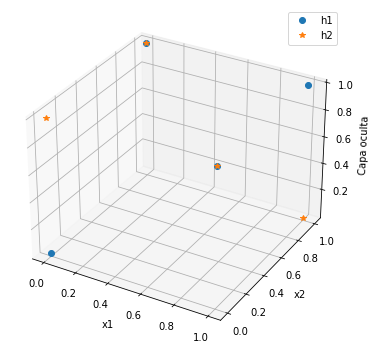

In [9]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(resultados[:,0], resultados[:,1], resultados[:,2], "o", label="h1")
ax.plot(resultados[:,0], resultados[:,1], resultados[:,3], "*", label="h2")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Capa oculta')
plt.legend(loc="upper right")
plt.show()

## Comentarios y conclusiones
* Se puede observar que la variable latente __h1__ siempre es cercana a 1 excepto cuando __x1__ y __x2__ son 0.
* La variable latente __h2__ siempre es cercana a 1, excepto cuando __x1__ y __x2__ son 1.
* El resultado __y__ es cercano a 0 excepto cuando __h1__ y __h2__ son cercanas a 1.
* Se puede observar claramente como la composición de funciones y el uso de funciones de activación como sigmoid en este caso ayudaron a romper la linealidad de los datos ingresados para formar la función __xor__.